# Project:No-Show Appointments Data Analysis 

Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Note:**:In this project I'll be analyzing a dataset associated with 100,000 mediacl appointments in Brazil.This data analysis focuses on finding out what factors are important for us to predict if a patient will show up for their schedueld appointment. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
#Load data and performe a few lines
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>**Notes:** 1.'Scheduled day' indicates on which day patient sets up their appointment. 2.'Neighbourhood' indicates the location of the hospital. 3.‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.(0:Not Enrolled;1:Enrolled). 4.Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [4]:
#display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#using duplicated function to see which rows are duplicated
df.duplicated()
print(sum(df.duplicated()))

0


In [6]:
#drop unnecessary columns 
df.drop(['AppointmentID','Neighbourhood','Scholarship','Hipertension','Alcoholism','Handcap','Diabetes'],axis=1,inplace=True)

In [7]:
#convert 'ScheduledDay' to datetime
df["ScheduledDay"] = pd.to_datetime([row[0] for row in df['ScheduledDay'].str.split("T")],format='%Y-%m-%d')

In [8]:
#convert 'AppointmentDay' to datetime
df['AppointmentDay']=pd.to_datetime([row[0] for row in df['AppointmentDay'].str.split("T")],format='%Y-%m-%d')

In [9]:
#convert 'SMS_received' to object
df['SMS_received']=df['SMS_received'].astype(object)

In [11]:
#create a 'No-show Count' column to be populated later
df['No-show Count']=df['No-show'].apply(lambda x: 1 if x == "Yes" else 0)
df['No-show Count']=df['No-show Count'].astype(float)

In [12]:
#check if datatypes are converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   Age             110527 non-null  int64         
 5   SMS_received    110527 non-null  object        
 6   No-show         110527 non-null  object        
 7   No-show Count   110527 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.7+ MB


In [13]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No-show,No-show Count
0,2.987250e+13,F,2016-04-29,2016-04-29,62,0,No,0.0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,0,No,0.0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,0,No,0.0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,0,No,0.0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,0,No,0.0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:Which age group has the highest no-show rate? 

In [14]:
#return useful descriptive statistics for 'age' column
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [15]:
#Create bin edges that will be used to "cut" the data into groups
bin_edges=[-1.000000,18.000000,37.000000,55.000000, 115.000000]

In [16]:
#create labels
bin_names=['Gen Z','Millenial','Gen X','Baby Boomers']

In [17]:
#create an age group column
df['Age Group']=pd.cut(df['Age'],bin_edges,labels=bin_names)

In [18]:
#check
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No-show,No-show Count,Age Group
0,2.987250e+13,F,2016-04-29,2016-04-29,62,0,No,0.0,Baby Boomers
1,5.589978e+14,M,2016-04-29,2016-04-29,56,0,No,0.0,Baby Boomers
2,4.262962e+12,F,2016-04-29,2016-04-29,62,0,No,0.0,Baby Boomers
3,8.679512e+11,F,2016-04-29,2016-04-29,8,0,No,0.0,Gen Z
4,8.841186e+12,F,2016-04-29,2016-04-29,56,0,No,0.0,Baby Boomers


In [19]:
df.groupby(['Age Group'])['No-show Count'].mean()

Age Group
Gen Z           0.219878
Millenial       0.235376
Gen X           0.195310
Baby Boomers    0.156450
Name: No-show Count, dtype: float64

(0.0, 0.3)

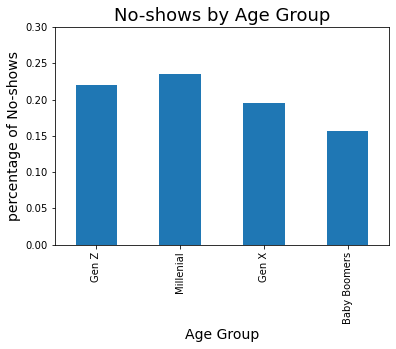

In [20]:
#plot a bar chart to compare these 4 age groups
df.groupby(['Age Group'])['No-show Count'].mean().plot(kind='bar');
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('percentage of No-shows',fontsize=14)
plt.title('No-shows by Age Group',fontsize=18)
plt.ylim(0,0.3)

>This graph tells us that millenials have the highest no-show rate, while baby boomers have the lowest no-show rate. However, the difference is not significant. As such, age group can not be considered a very effective factor to predict if a patient will show up for their medical appointment. 

### What is the relationship between age and no-shows? 

In [21]:
#creat a subset
df_age_noshow=df[['PatientId','Age','No-show']]
df_age_noshow = df_age_noshow.copy()

In [22]:
# convert No-show to int
df_age_noshow['No-show Count']=df_age_noshow['No-show'].apply(lambda x: 1 if x == "Yes" else 0)
df_age_noshow['No-show Count']=df_age_noshow['No-show Count'].astype(float)
df_age_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientId      110527 non-null  float64
 1   Age            110527 non-null  int64  
 2   No-show        110527 non-null  object 
 3   No-show Count  110527 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.4+ MB


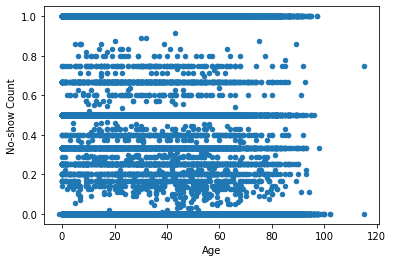

In [23]:
df_age_noshow.groupby(['PatientId'])[['Age','No-show Count']].mean().plot(x='Age',y='No-show Count',kind='scatter');

>As the density of the population under the 0.5 line is much higher than that of above, this tells us that more often than not, patients show up to their appointments.

>There appears to be little to no correlation between age and no-shows.

### Which day of the week has the lowerst no-show rate?

In [24]:
#create a 'weekday' column
df['Weekday']=df['AppointmentDay'].dt.dayofweek

In [25]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No-show,No-show Count,Age Group,Weekday
0,2.987250e+13,F,2016-04-29,2016-04-29,62,0,No,0.0,Baby Boomers,4
1,5.589978e+14,M,2016-04-29,2016-04-29,56,0,No,0.0,Baby Boomers,4
2,4.262962e+12,F,2016-04-29,2016-04-29,62,0,No,0.0,Baby Boomers,4
3,8.679512e+11,F,2016-04-29,2016-04-29,8,0,No,0.0,Gen Z,4
4,8.841186e+12,F,2016-04-29,2016-04-29,56,0,No,0.0,Baby Boomers,4


Text(0.5, 1.0, 'Weekdays')

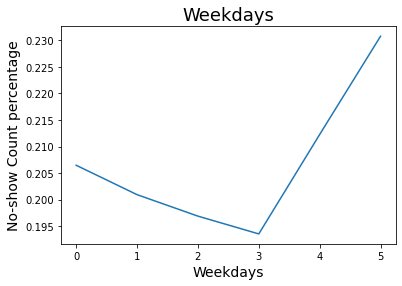

In [26]:
#count num of no_shows accoriding to weekdays---The day of the week with Monday=0, Sunday=6
df.groupby(['Weekday'])['No-show Count'].mean().plot(kind='line')
plt.xlabel('Weekdays',fontsize=14)
plt.ylabel('No-show Count percentage',fontsize=14)
plt.title('Weekdays',fontsize=18)

>Wednsday has the least no-show rate compared to other weekdays. Although the line trend looks very dramatic on this chart, note that the rate difference among weekdays is actullay not too significant, due to the axis range used. 

>Based on this analysis, the day of the week is not an effective factor to predict if a patient will show up for their schedueled appointment.

### Which gender has a higher no-show rate? 

Text(0.5, 1.0, 'No-show rate by gender')

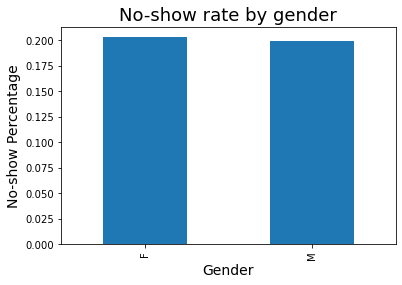

In [27]:
#create a bar chart
df.groupby(['Gender'])['No-show Count'].mean().plot(kind='bar')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('No-show Percentage',fontsize=14)
plt.title('No-show rate by gender',fontsize=18)


>Female has a higher no-show rate than Male.However, the rate difference is not significant. As such, gender can not be considered as an effective factor to predict if a patient shows up for medical appointments. 

<a id='limitations'></a>
## Limitations

> While working on this project, I have faced a few challenges. For example, in my erlier version, I used the count() function to compare the number of no-shows in each category. After a few hours of consideration, I changed my mind and decided to use the mean() function to calculate the no-show percentage instead, which is a more accurate metric that is independent of the number of appointments.

>This analysis has come with some limitations. Namely, I was not able to draw conclusions about which fatocrs were effective to predict if a patient shows up for their medical appointment, due to insignificant differences in no-show rate comparison across dimensions. Additionally, even with demonstrated correllation between a certain attribute and no-show rates, this does not indicate causation conclusively.

<a id='conclusions'></a>
## Conclusions

> Age, weekdays and gender are not effective factors to predict if a patient shows up for medical appointments. The variable analyzed are not sufficient to draw conclusions. The missing variables that may aid prediction include the severity of conditions and the flexibility of their time, which may be implied by factors such as occupation. While there appears to be some degree of correllation between certain groups and rate of no-shows, this does not mean for certain that age, weekdays and gender have a causal relationship with no-shows.
